# Projet 5 : Optimisez la gestion des données d'une boutique avec R ou Python

## **1. Introduction**

### **1.1 Importation des librairies**

In [767]:
# On importe les libraires

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Graphiques
import seaborn as sns # Graphiques

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

### **1.2 Importation des données**

In [768]:
# Importation des exports de Laurent et du tableau de liaision de Sylvie : 3 fichiers excel au format Excel.

df_ERP = pd.read_excel('erp.xlsx')
df_WEB = pd.read_excel('web.xlsx')
df_Liaison = pd.read_excel('liaison.xlsx')

### 1.3 DataFrame 'ERP'

In [769]:
#On affiche le dataframe 'ERP'
df_ERP.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [770]:
#On affiche un aperçu de 'ERP'
df_ERP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [771]:
#Somme des Nans par colonne
print('Données manquantes par colonne')
df_ERP.isna().sum()

Données manquantes par colonne


product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [772]:
#On affiche le nombre de doublon dans la colonne 'product_id'
df_ERP.duplicated('product_id').sum()

0

In [773]:
print ('Le DF ERP ne semble pas avoir de données manquantes ni de doublons, nous gardons ce fichier sans modifications')

Le DF ERP ne semble pas avoir de données manquantes ni de doublons, nous gardons ce fichier sans modifications


### 1.4 DataFrame 'WEB'

In [774]:
#On affiche un aperçu du dataframe 'web'
df_WEB.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [775]:
#On affiche un aperçu de 'WEB'
df_WEB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [776]:
#Somme des Nans par colonne
print('Données manquantes par colonne')
df_WEB.isna().sum()

Données manquantes par colonne


sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

On peut voir que la colonne 'sku' à 85 données manquantes, hors la mojoritée des autres colonnes en ont 83. 

Il doit donc y avoir 2 ligne du dataframe Web ou la colonne SKU est vide alors qu'il y a des informations dans les autres colonnes.

On remarque quue les seules colonnes sans aucunes données manquante sont: 'virtual, 'downloadable', 'rating_count'

In [777]:
#On affiche les lignes qui ont des données manquantes dans la colonnes 'sku'
df_WEB_nan = df_WEB[df_WEB['sku'].isna()]
df_WEB_nan.head(30)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On trouve bien les 2 lignes qui sont remplies mais qui contiennent des NaN pour la colonne 'sku'.

Ce sont probablement deux produits qui ne sont plus vendus car on peut voir que le post a été modifié en 2019 alors qu'il a été posté en 2018 donc 2 anciens produits qui ne sont plus commercialisés.

On voit aussi que toutes les autres ligne sont remplis uniquement pour les colonnes 'virtual, 'downloadable' 'rating_count' avec comme valeur 0.

In [778]:
#On stock les deux lignes contenant des informations dans chaques colonnes sauf 'sku' dans deux dataframe
NaN_470_471 = df_WEB.loc[(df_WEB['sku'].isnull()) & (df_WEB['post_type'] == "product"),:]

In [779]:
#On affiche NaN_470_471 pour voir verifier qu'elle sont bien stockées
NaN_470_471.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [780]:
#On affiche les doublons de la colonne 'sku' qui contient les numéros id
df_WEB.duplicated('sku').sum()

798

In [781]:
#On affiche les valeurs uniques du dataframe WEB
df_WEB.nunique()

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [782]:
#On affiche un produit pour avoir un aperçu du doublon
df_WEB.loc[df_WEB['sku'] == 'bon-cadeau-25-euros']

#Les lignes sont bien identiques à l'exception des colonnes "tax_status", "post_type" et "post-mime_type"

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [783]:
# On convertit la colonne 'sku' en chaînes de caractères afin de faire apparaitre les autres doublons qui sont des chiffres.
df_WEB['sku'] = df_WEB['sku'].astype(str)

In [784]:
#On affiche un produit pour avoir un aperçu du doublon
df_WEB.loc[df_WEB['sku'] == '15296']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [785]:
#On affiche un autre produit pour avoir un aperçu du doublon
df_WEB.loc[df_WEB['sku'] == '15298']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Sur les deux produits choisis, nous avons bien un doublon sur les deux.
Il y a des différences qui se situe au niveau des colonnes 'tax_status' (l'un a une valeur 'taxable' l'autre aucune valeur), 'post_type'( product ou attachment), et 'post_mime_type' avec la présence d'une photo attaché ou non. Nous devrions garder les lignes contenant la photo des produits car c'est plus logique pour un site WEB cependant nous allons quand meme garder les lignes ou il y a le post type product car il s'agit d'une demande sur le chiffre d'affaires des produits et/ou ses valeurs atypiques ou aberrantes donc la photo n'est pas utile pour ces requetes.

### 1.4.1 Nettoyage du DataFrame 'WEB'

In [786]:
#On garde les doublons de la colonne post_type "product"
df_WEB = df_WEB[df_WEB.post_type=="product"]

In [787]:
#On supprime les colonnes qui contiennent que des Nans
df_WEB = df_WEB.dropna(how='all', axis=1)

In [788]:
#On renomme la colone 'sku' en 'id_web'
df_WEB = df_WEB.rename(columns={'sku':"id_web"})

In [789]:
#On affiche les info de 'web'
df_WEB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             716 non-null    object        
 1   virtual            716 non-null    int64         
 2   downloadable       716 non-null    int64         
 3   rating_count       716 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  post_title         716 non-null    object        
 11  post_excerpt       716 non-null    object        
 12  post_status        716 non-null    object        
 13  comment_status     716 non-null    object        
 14  ping_statu

In [790]:
#On affiche 'web'
df_WEB.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [791]:
#On convertit à nouveau la colonne 'id-web' en numerique à l'exception de la ligne 'bon pour cadeau 25€'
df_WEB['id_web'] = pd.to_numeric(df_WEB['id_web'], errors='coerce')
df_WEB['id_web'] = df_WEB['id_web'].fillna('bon-cadeau-25-euros')

### 1.5 DataFrame 'df_Liaison'

In [792]:
#On affiche un aperçu du dataframe 'liaison'
df_Liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [793]:
#On affiche un autre aperçu dy type de données de 'liaison'
df_Liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [794]:
#Somme des Nans par colonne
print(' Données manquantes par colonne :')
df_Liaison.isna().sum()

 Données manquantes par colonne :


product_id     0
id_web        91
dtype: int64

In [795]:
#On affiche un aperçu des données manquante de 'id_web'
id_web_nan = df_Liaison[df_Liaison['id_web'].isna()]
id_web_nan.head(10)

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
184,4278,NaN
185,4279,NaN
234,4565,NaN
238,4577,NaN


In [796]:
#On affiche le nombre de doublons dans la colonne 'product_id'
df_Liaison.duplicated('product_id').sum()

0

In [797]:
#On affiche le nombre de doublons dans la colonne 'id_web'
df_Liaison.duplicated('id_web').sum()

90

### 1.5.1 nettoyage du dataframe 'df_Liaison'

In [798]:
#On affiche la donnée manquante de 'id_web'
id_web_nan = df_Liaison[df_Liaison['id_web'].isna()]
id_web_nan.head(10)

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
184,4278,NaN
185,4279,NaN
234,4565,NaN
238,4577,NaN


Les Product ID crée par Sylvie sont probablement des produits référencés auprès de nos fournisseurs mais qui n'ont jamais été mis en ventes sur le web donc il n'ont à l'heure actuelle pas d'Id_Web, on suprimme donc toutes les lignes qui contiennent un NaN dans id_web

In [799]:
#On suprimme toutes les lignes qui contiennent une Nan dans id_web
df_Liaison = df_Liaison.dropna()

In [800]:
#On affiche le nombre de doublons dans la colonne 'id_web' pour verifier qu'il n'en reste pas après la supression des Nans
df_Liaison.duplicated('id_web').sum()

0

In [801]:
df_Liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


## 2. Fusion des 3 dataframes

Grace à la fonction "duplicated.sum" effectué sur chaque dataframe lors du nettoyage, j'ai pu m'assurer de l'unicité de la colonne qui me servira de clé primaire afin de lier les 3 DF. Nous allons donc lier ces Dataframes entre eux par la colonne product-id entre le fichier liaison et le fichier ERP puis par la colonne id_web entre ce nouveau fichier et le dataframe WEB afin d'obenir toutes les informations sur un seul dataframe nommé DF.

In [802]:
#On fusionne le dataframe 'liaison' à 'erp' dans un dataframe appelé df
df =df_Liaison.merge(right=df_ERP, on=['product_id'])

In [803]:
#On affiche df
df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [804]:
#On fusionne 'id_web' à df
df = df.merge(right=df_WEB, on=['id_web'])

In [805]:
#On affiche df
df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [806]:
#On affiche les informations de df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         716 non-null    int64         
 1   id_web             716 non-null    object        
 2   onsale_web         716 non-null    int64         
 3   price              716 non-null    float64       
 4   stock_quantity     716 non-null    int64         
 5   stock_status       716 non-null    object        
 6   virtual            716 non-null    int64         
 7   downloadable       716 non-null    int64         
 8   rating_count       716 non-null    int64         
 9   average_rating     716 non-null    float64       
 10  total_sales        716 non-null    float64       
 11  tax_status         716 non-null    object        
 12  post_author        716 non-null    float64       
 13  post_date          716 non-null    datetime64[ns]
 14  post_date_

## 3. Le Chiffre d'Affaires

### 3.1 Le Chiffre d'Affaires par produit

In [807]:
#On ajoute une colonne ca contenant le chiffre d'affaire pour chaque produit
df["ca"] = df["price"]*df["total_sales"]

In [808]:
#On affiche un aperçu de df pour voir la colonne avce les chiffre d'affaire par produit
df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,145.2
1,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,42.3
4,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0


### 3.2 Le Chiffre d'Affaires Global

In [809]:
#On stock la sommes de la colonne 'ca' dans une variable appelé 'ca'
ca = df['ca'].sum()
print("le chiffre d'affaire total est de:",ca,"€")

le chiffre d'affaire total est de: 70568.6 €


## 4. Les Outliers

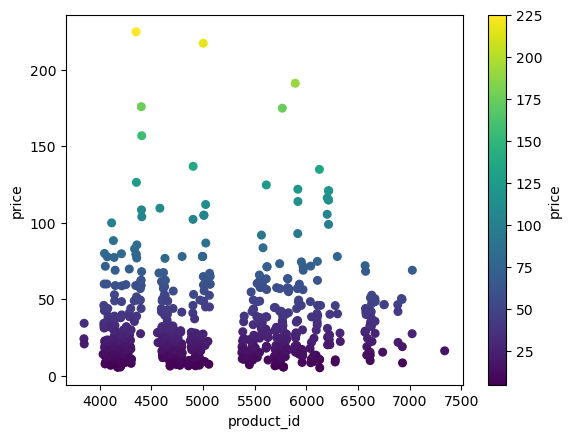

In [810]:
#On affiche un nuage de point des prix des articles pour repéré d'eventuelle prix abérrant
df.plot.scatter(x='product_id', y='price', c = 'price', s=30, cmap = 'viridis');

On remarque qu'il y a un vingtaine prix qui sortent du lot (valeur au dessus au dessus de 100€)

Le premier quartile est de: 14.1 
Le troisième quartile est de: 42.025
upperBound :  83.9125


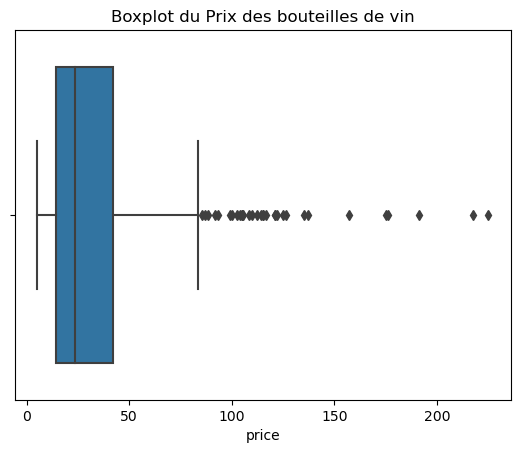

In [811]:
#On affiche un boxplot des prix

sns.boxplot(x = df.price)
plt.title('Boxplot du Prix des bouteilles de vin')

#On definit une fonction qui calcul les prix qui sont en dehors de la distance interquartile, donc outliers
def outlierHandling(price):
    price = sorted(price)
    Q1 , Q3 = np.percentile(price, [25,75])
    print('Le premier quartile est de:',Q1,'\n''Le troisième quartile est de:',Q3)
    IQR = Q3 - Q1
    upperBound = Q3 + (1.5 * IQR)
    print('upperBound : ', upperBound)
    return upperBound

upperbound = outlierHandling(df.price)
outliers= df[(df.price > upperbound)]

Ce boxplot nous montre qu'il y a beaucoup de prix qui sont considéré comme outliers

### 4.1 La methode de la plage interquartile (IQR)

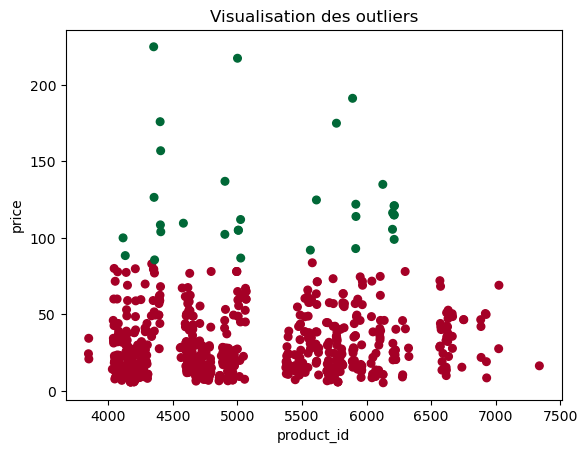

In [812]:
#On crée les variables quartiles Q1 et Q3
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

#On crée la variable distance interquartile (Inter-quartile range)
IQR = Q3 - Q1

#On crée une colonne 'outliers' qui definit par true ou false les outliers
df['outliers'] = (df.price > (Q3 + 1.5 * IQR))

#On affiche une visualisation des outliers
plt.scatter(df['product_id'],df['price'],s = 30,c = df['outliers'],cmap = 'RdYlGn')
plt.xlabel('product_id')
plt.ylabel('price')
plt.title('Visualisation des outliers')
plt.show()


In [813]:
#On affiche le nombre de prix considéré comme outliers
df.outliers.sum()

32

In [814]:
outliers.head(32)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
63,4115,15382,1,100.0,11,instock,0,0,0,0.0,...,closed,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
65,4132,11668,1,88.4,5,instock,0,0,0,0.0,...,closed,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
199,4352,15940,1,225.0,0,outofstock,0,0,0,0.0,...,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1125.0
201,4355,12589,1,126.5,2,instock,0,0,0,0.0,...,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1391.5
205,4359,13853,1,85.6,0,outofstock,0,0,0,0.0,...,closed,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,85.6
218,4402,3510,1,176.0,8,instock,0,0,0,0.0,...,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0
219,4404,3507,1,108.5,2,instock,0,0,0,0.0,...,closed,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,217.0
221,4406,7819,1,157.0,3,instock,0,0,0,0.0,...,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
222,4407,3509,1,104.0,6,instock,0,0,0,0.0,...,closed,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,104.0
227,4582,12857,1,109.6,7,instock,0,0,0,0.0,...,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0


### 4.2 la methode du Z-Score

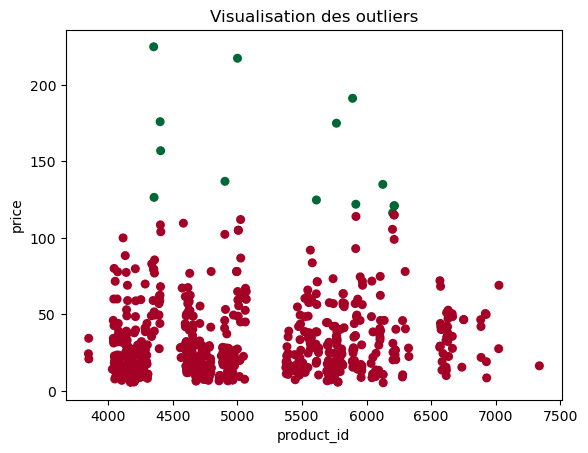

In [815]:
# Calculer la moyenne et l'écart type de la colonne "price" du DataFrame
mean_price = df['price'].mean()
std_price = df['price'].std()

# Calculer le Z-score pour chaque valeur dans la colonne "price"
z_scores = np.abs((df['price'] - mean_price) / std_price)

# Identifier les valeurs aberrantes en utilisant un seuil de 3 pour le Z-score
df['outliersZ'] = z_scores > 3

#On affiche une visualisation des outliers
plt.scatter(df['product_id'],df['price'],s = 30,c = df['outliersZ'] ,cmap = 'RdYlGn')
plt.xlabel('product_id')
plt.ylabel('price')
plt.title('Visualisation des outliers')
plt.show()

In [816]:
df.outliersZ.sum()

14

In [817]:
outliersZ = df[df['outliersZ']].head(14)

In [818]:
outliersZ.head(14)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca,outliers,outliersZ
199,4352,15940,1,225.0,0,outofstock,0,0,0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1125.0,True,True
201,4355,12589,1,126.5,2,instock,0,0,0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1391.5,True,True
218,4402,3510,1,176.0,8,instock,0,0,0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0,True,True
221,4406,7819,1,157.0,3,instock,0,0,0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True,True
381,4904,14220,1,137.0,13,instock,0,0,0,0.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,685.0,True,True
429,5001,14581,1,217.5,20,instock,0,0,0,0.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True,True
514,5612,14915,1,124.8,12,instock,0,0,0,0.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True,True
556,5767,15185,1,175.0,12,instock,0,0,0,0.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True,True
590,5892,14983,1,191.3,10,instock,0,0,0,0.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,573.9,True,True
606,5917,14775,1,122.0,4,instock,0,0,0,0.0,...,2020-03-11 09:30:09,2020-03-11 08:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0,True,True


J'ai pris les produits qui ont un prix considéré comme outliers et j'ai comparé leurs prix sur internet et leurs prix sont cohérents, ce sont donc juste des vins qui sont plus chères dû à leurs qualité/rareté.

Voici 2 sources internet sur lesquels nous pouvons regarder le prix de ces bouteilles : 

https://www.vinatis.com/

https://www.wine-searcher.com/

En conclusion nous pouvons dire que ces prix élevés par rapport aux autres produits sont juste des vins ou spiritueux de meilleure qualité ou plus rare, en effet certains vins ou spiritueux sont produits en quantité limitée ou millésimé donc un plus grand coût de fabrication ou une rareté. Les prix sont cohérents avec les prix du marché, nous n'avons pas affaire à des données aberrantes.